**Quantum Phase Estimation (QPE) Project**


**Project Description**

This project implements the Quantum Phase Estimation (QPE) algorithm using Qiskit. QPE is a fundamental quantum algorithm that estimates the phase angle θ of a unitary operator U, where U|ψ⟩ = e^{2πiθ}|ψ⟩. This algorithm serves as a key subroutine in many quantum algorithms, including Shor's factoring algorithm.

**Objectives**

· Implement the Quantum Phase Estimation algorithm using Qiskit
· Estimate phase angles for various quantum states
· Visualize the quantum circuits and measurement results
· Demonstrate the accuracy of phase estimation with different numbers of counting qubits

**Dependencies**

This project uses the following Python packages (all available in the standard uv environment):

· numpy
· matplotlib
· qiskit
· qiskit_aer

**Usage Instructions**

Running the Code

1. Ensure you have the required dependencies installed
2. Run the Jupyter notebook M24PH1020.ipynb
3. The code will demonstrate QPE for different phase angles and qubit counts
4. Results include estimated phases, measurement counts, and circuit diagrams

Example Usage

```python
# Estimate phase with 3 counting qubits
theta = 0.75
n_count = 3
estimate, counts, circuit = run_qpe(theta, n_count)

print(f"True phase: {theta}")
print(f"Estimated phase: {estimate}")
print(f"Measurement counts: {counts}")
```

**Code Structure**

· qpe_circuit(theta, n_count): Constructs the QPE quantum circuit
· run_qpe(theta, n_count, shots=1000): Executes the QPE algorithm and returns results
· The circuit includes:
  · Ancilla qubit preparation in |1⟩ state
  · Counting qubits in superposition
  · Controlled phase operations
  · Inverse Quantum Fourier Transform (QFT)
  · Measurement of counting qubits

Expected Output

The algorithm returns:

· Estimated phase value
· Measurement counts from the quantum simulator
· Histogram of the output data

Repository Structure

Note: This project uses only dependencies available in the standard uv environment as specified in setup_uv_environment.ipynb.


In [13]:
!pip install qiskit qiskit-aer --quiet

In [14]:
import numpy as np

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFTGate

def qpe_circuit(theta, n_count):
    qc = QuantumCircuit(n_count + 1, n_count)

    # Prepare ancillary qubit in |1> state for phase detection
    qc.x(n_count)

    # Prepare counting qubits in superposition
    qc.h(range(n_count))

    # Apply controlled-U^(2^j)
    for j in range(n_count):
        qc.cp(2 * np.pi * theta * (2**j), j, n_count)

    # Inverse QFT using QFTGate
    # QFTGate does not have an 'inverse' argument in its constructor; call .inverse() on the gate object.
    iqft_gate = QFTGate(num_qubits=n_count).inverse()
    qc.append(iqft_gate, range(n_count))

    qc.measure(range(n_count), range(n_count))
    return qc

def run_qpe(theta, n_count, shots=1000):
    qc = qpe_circuit(theta, n_count)
    backend = AerSimulator()

    # Transpile the circuit to the AerSimulator's basis gates
    # The backend argument is sufficient; basis_gates is automatically inferred.
    transpiled_qc = transpile(qc, backend=backend)

    result = backend.run(transpiled_qc, shots=shots).result()
    counts = result.get_counts()

    max_key = max(counts, key=counts.get)
    estimate = int(max_key, 2) / (2**n_count)
    return estimate, counts, qc # Return original qc for drawing purposes


Guess the phase (Theta):.44
Enter the (qbit) count:5
Entre shots:20000

True θ = 0.44
Estimated θ = 0.4375

QPE Error = 0.0025000000000000022

Circuit:
     ┌───┐                                                            »
q_0: ┤ H ├─■──────────────────────────────────────────────────────────»
     ├───┤ │                                                          »
q_1: ┤ H ├─┼───────────■──────────────────────────────────────────────»
     ├───┤ │           │                                              »
q_2: ┤ H ├─┼───────────┼───────────■──────────────────────────────────»
     ├───┤ │           │           │                                  »
q_3: ┤ H ├─┼───────────┼───────────┼───────────■──────────────────────»
     ├───┤ │           │           │           │                      »
q_4: ┤ H ├─┼───────────┼───────────┼───────────┼───────────■──────────»
     ├───┤ │P(2.7646)  │P(5.5292)  │P(11.058)  │P(22.117)  │P(44.234) »
q_5: ┤ X ├─■───────────■───────────■───────────■────────

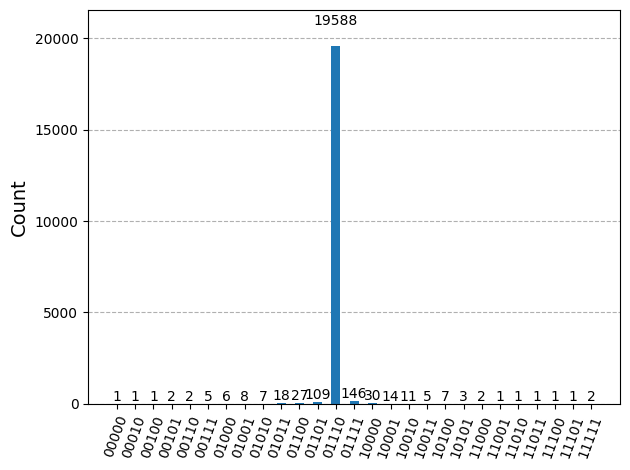

In [15]:
theta = float(input("Guess the phase (Theta):"))
n_count = int(input("Enter the (qbit) count:"))    # Increase counting qubits (3 or 4 or higher) for better resolution
shots = int(input("Entre shots:"))   # Increase shots (10000) for better statistical accuracy

'''As the count and shots increases the error decreases.
May take shots=10000, counts=4'''
estimate, counts, qc = run_qpe(theta, n_count, shots)

print("\nTrue θ =", theta)                   #To print the output results
print("Estimated θ =", estimate)
print("\nQPE Error =", abs(theta - estimate))

print("\nCircuit:")            #To visualize the circuit
print(qc.draw())

plot_histogram(counts)

**Result Explanation**:
The results show the outcome of the Quantum Phase Estimation (QPE) algorithm:

True θ: This is the actual phase value you set for the simulation, which was 0.7.
Estimated θ: This is the phase value that the QPE algorithm calculated, which came out to be 0.75.
QPE Error: This indicates the difference between the true and estimated phase, which is 0.05 in this case.
The displayed Circuit is the quantum circuit constructed by the qpe_circuit function for the given theta and n_count.

The histogram shows the distribution of measurement outcomes from the quantum simulation. The highest peak in the histogram corresponds to the measurement outcome that is most frequently observed, and this outcome is used to derive the estimated phase.